Hanh Tran

Class: DSC 630

Due Date: 12/20/2020



## Assignment 3.3

For this week’s assignment we're going to use Dodgers Major League Baseball data from 2012. The data file you will be using is contained in the dodgers.csv file. I would like you to determine what night would be the best to run a marketing promotion to increase attendance. It is up to you if you decide to recommend a specific date or if you  recommend a day of the week (e.g., Tuesdays) or month and day of the week (e.g., July Tuesdays). Use R and/or Python to accomplish this assignment. It is important to remember, there will be lots of ways to solve this problem. Explain your thought process and how you used various techniques to come up with your recommendation. From this data, at a minimum, you should be able to demonstrate the following:

Box plots

Scatter plots

Regression Model

In [3]:
# import libraries for visualizations
library(car)
library(lattice)
library(ggplot2)

In [4]:
# read in data and assign variable dodgers to dataframe
dodgers <- read.csv("dodgers.csv")

In [5]:
# check the structure of the data frame
print(str(dodgers))  

'data.frame':	81 obs. of  12 variables:
 $ month      : Factor w/ 7 levels "APR","AUG","JUL",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ day        : int  10 11 12 13 14 15 23 24 25 27 ...
 $ attend     : int  56000 29729 28328 31601 46549 38359 26376 44014 26345 44807 ...
 $ day_of_week: Factor w/ 7 levels "Friday","Monday",..: 6 7 5 1 3 4 2 6 7 1 ...
 $ opponent   : Factor w/ 17 levels "Angels","Astros",..: 13 13 13 11 11 11 3 3 3 10 ...
 $ temp       : int  67 58 57 54 57 65 60 63 64 66 ...
 $ skies      : Factor w/ 2 levels "Clear ","Cloudy": 1 2 2 2 2 1 2 2 2 1 ...
 $ day_night  : Factor w/ 2 levels "Day","Night": 1 2 2 2 2 1 2 2 2 2 ...
 $ cap        : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 1 ...
 $ shirt      : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 1 ...
 $ fireworks  : Factor w/ 2 levels "NO","YES": 1 1 1 2 1 1 1 1 1 2 ...
 $ bobblehead : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 1 ...
NULL


Below we have the following data as promotions that were ran in 2012:

Cap

Shirt

Fireworks

Bobblehead

There was limited promotions for cap & shirt which does not offer a good predictor variable as a promotion. Fireworks as a promotion is also limited because they are displayed mostly for night games during clear skies. 

In [10]:
head(dodgers)

month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,ordered_day_of_week,ordered_month
APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO,Tue,April
APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO,Wed,April
APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO,Thur,April
APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO,Fri,April
APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO,Sat,April
APR,15,38359,Sunday,Padres,65,Clear,Day,NO,NO,NO,NO,Sun,April


## EDA - Box plots and Scatterplots

In [6]:
# define an ordered day-of-week variable
# for plots and data summaries
dodgers$ordered_day_of_week <- with(data=dodgers,
  ifelse ((day_of_week == "Monday"),1,
  ifelse ((day_of_week == "Tuesday"),2,
  ifelse ((day_of_week == "Wednesday"),3,
  ifelse ((day_of_week == "Thursday"),4,
  ifelse ((day_of_week == "Friday"),5,
  ifelse ((day_of_week == "Saturday"),6,7)))))))
# convert variable day of week as factor and create labels
dodgers$ordered_day_of_week <- factor(dodgers$ordered_day_of_week, levels=1:7,
labels=c("Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"))

          ordered_day_of_week
bobblehead Mon Tue Wed Thur Fri Sat Sun
       NO   12   7  12    3  13  11  12
       YES   0   6   0    2   0   2   1

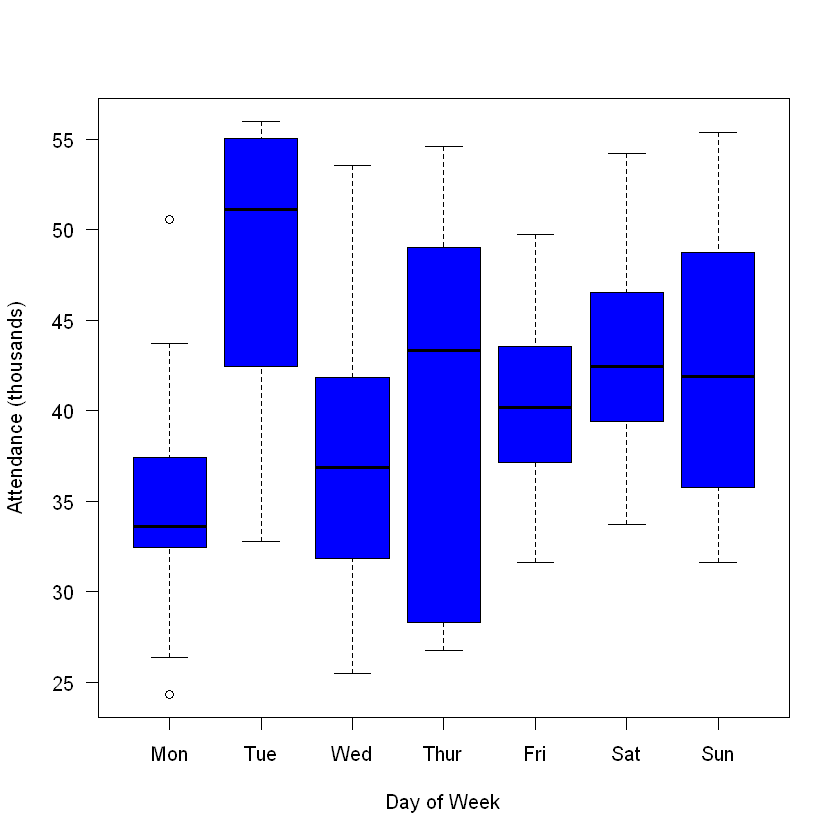

In [14]:
# attendance by day of week, convert thousands to a more viewable scale
with(data=dodgers,plot(ordered_day_of_week, attend/1000,
xlab = "Day of Week", ylab = "Attendance (thousands)",
col = "blue", las = 1))

# when do the Dodgers use bobblehead promotions
with(dodgers, table(bobblehead,ordered_day_of_week)) # bobbleheads on Tuesday

# define an ordered month variable
# for plots and data summaries
dodgers$ordered_month <- with(data=dodgers,
  ifelse ((month == "APR"),4,
  ifelse ((month == "MAY"),5,
  ifelse ((month == "JUN"),6,
  ifelse ((month == "JUL"),7,
  ifelse ((month == "AUG"),8,
  ifelse ((month == "SEP"),9,10)))))))
dodgers$ordered_month <- factor(dodgers$ordered_month, levels=4:10,
labels = c("April", "May", "June", "July", "Aug", "Sept", "Oct"))

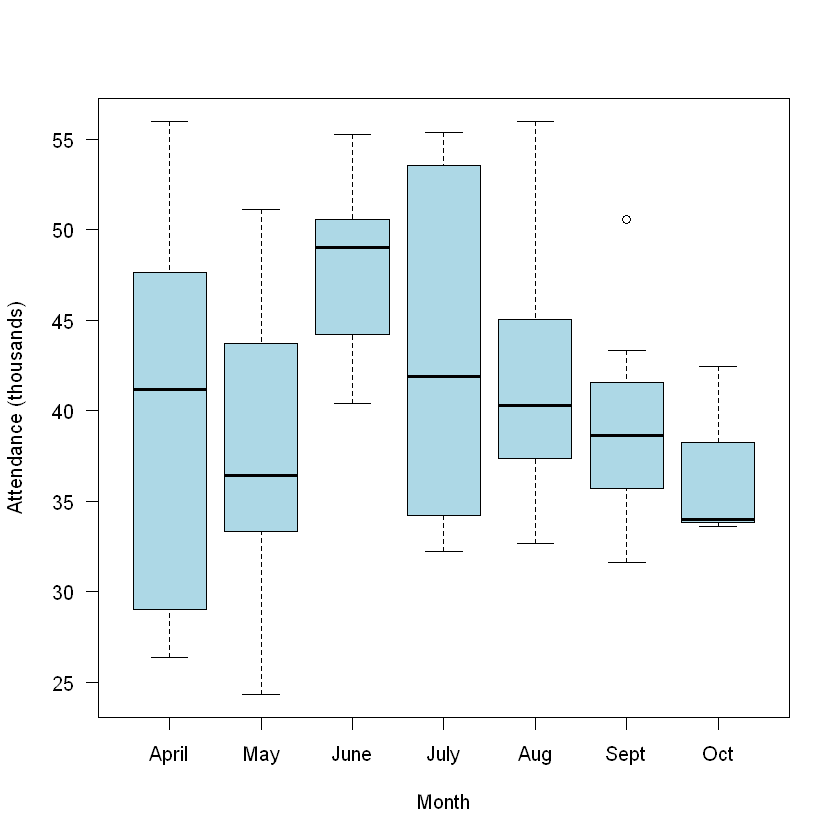

In [8]:
# boxplot attendance by month
with(data=dodgers,plot(ordered_month,attend/1000, xlab = "Month",
ylab = "Attendance (thousands)", col = "light blue", las = 1))

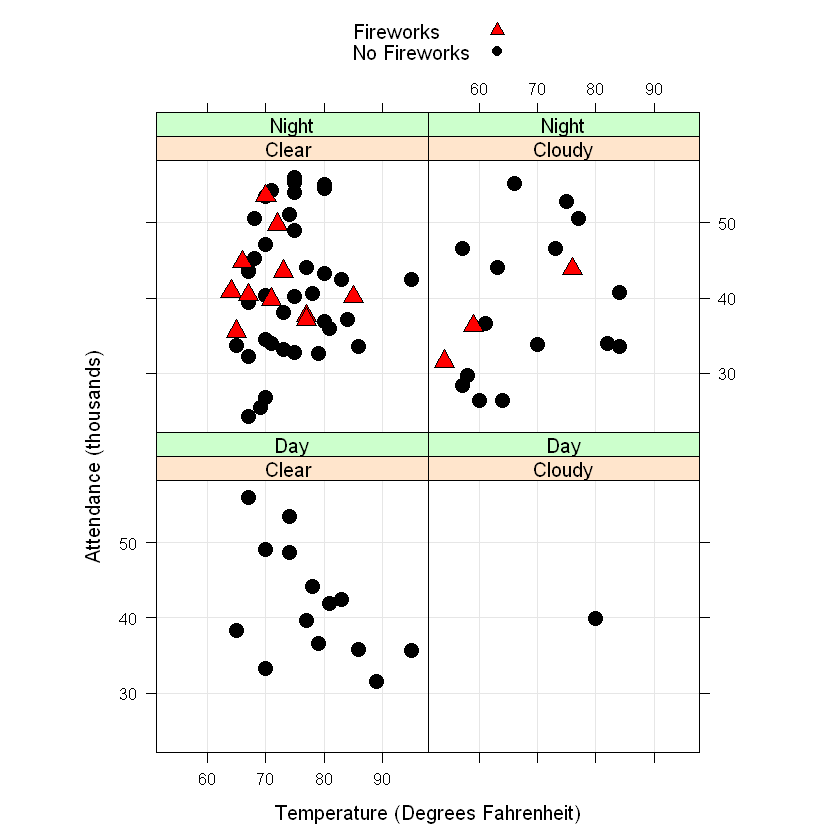

In [15]:
# attendance by weather and fireworks
# conditioning on day/night
# skies and whether or not fireworks are displayed
# prepare a graphical summary of the dodgers data
group.labels <- c("No Fireworks","Fireworks")
group.symbols <- c(21,24)
group.colors <- c("black","black")
group.fill <- c("black","red")
xyplot(attend/1000 ~ temp | skies + day_night,
    data = dodgers, groups = fireworks, pch = group.symbols,
    aspect = 1, cex = 1.5, col = group.colors, fill = group.fill,
    layout = c(2, 2), type = c("p","g"),
    strip=strip.custom(strip.levels=TRUE,strip.names=FALSE, style=1),
    xlab = "Temperature (Degrees Fahrenheit)",
    ylab = "Attendance (thousands)",
    key = list(space = "top",
        text = list(rev(group.labels),col = rev(group.colors)),
        points = list(pch = rev(group.symbols), col = rev(group.colors),
        fill = rev(group.fill))))


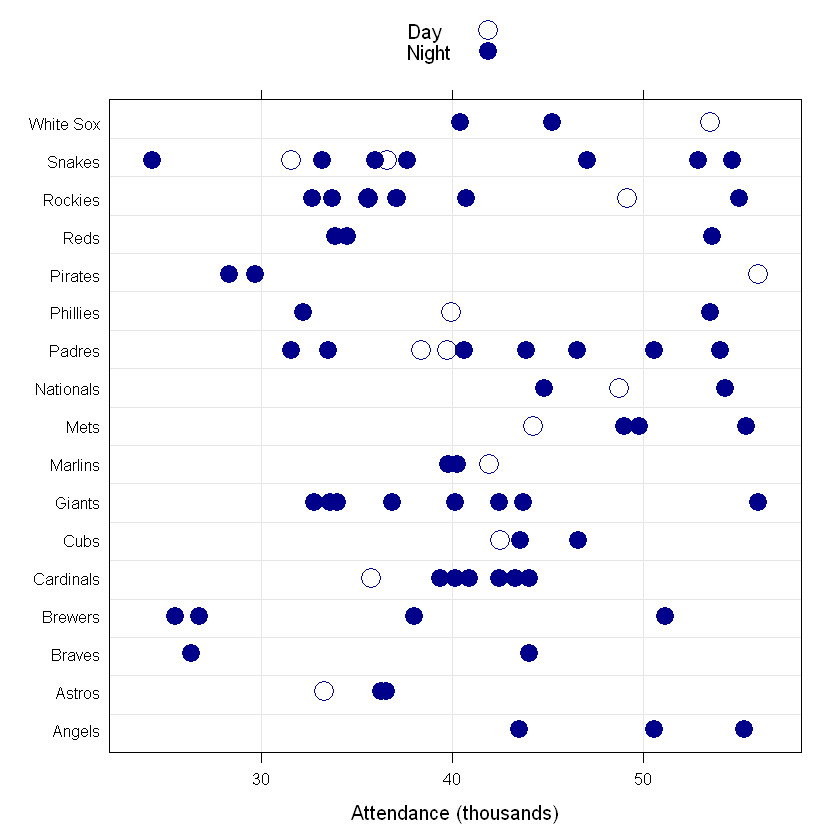

In [18]:
# attendance by opponent and day/night game
group.labels <- c("Day","Night")
group.symbols <- c(1,20)
group.symbols.size <- c(2,2.75)
bwplot(opponent ~ attend/1000, data = dodgers, groups = day_night,
    xlab = "Attendance (thousands)",
    panel = function(x, y, groups, subscripts, ...)
       {panel.grid(h = (length(levels(dodgers$opponent)) - 1), v = -1)
        panel.stripplot(x, y, groups = groups, subscripts = subscripts,
        cex = group.symbols.size, pch = group.symbols, col = "darkblue")
       },
    key = list(space = "top",
    text = list(group.labels,col = "black"),
    points = list(pch = group.symbols, cex = group.symbols.size,
    col = "darkblue")))

In the scatter plot above we see that opponents from other metropolitan areas are associated with a higher attendence but data seems limited which can be problematic as a predictor variable. 

In [25]:
# employ training-and-test for model validation
training_test <- c(rep(1,length=trunc((2/3)*nrow(dodgers))),
rep(2,length=(nrow(dodgers) - trunc((2/3)*nrow(dodgers)))))
dodgers$training_test <- sample(training_test) # random permutation
dodgers$training_test <- factor(dodgers$training_test,
  levels=c(1,2), labels=c("TRAIN","TEST"))
dodgers.train <- subset(dodgers, training_test == "TRAIN")
print(str(dodgers.train)) # check training data frame
dodgers.test <- subset(dodgers, training_test == "TEST")
print(str(dodgers.test)) # check test data frame

'data.frame':	54 obs. of  15 variables:
 $ month              : Factor w/ 7 levels "APR","AUG","JUL",..: 1 1 1 1 1 1 5 5 5 5 ...
 $ day                : int  10 12 13 27 28 29 8 9 11 13 ...
 $ attend             : int  56000 28328 31601 44807 54242 48753 32799 33993 35591 49124 ...
 $ day_of_week        : Factor w/ 7 levels "Friday","Monday",..: 6 5 1 1 3 4 6 7 1 4 ...
 $ opponent           : Factor w/ 17 levels "Angels","Astros",..: 13 13 11 10 10 10 7 7 15 15 ...
 $ temp               : int  67 57 54 66 71 74 75 71 65 70 ...
 $ skies              : Factor w/ 2 levels "Clear ","Cloudy": 1 2 2 1 1 1 1 1 1 1 ...
 $ day_night          : Factor w/ 2 levels "Day","Night": 1 2 2 2 2 1 2 2 2 1 ...
 $ cap                : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 1 ...
 $ shirt              : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 2 1 1 1 1 ...
 $ fireworks          : Factor w/ 2 levels "NO","YES": 1 1 2 2 1 1 1 1 2 1 ...
 $ bobblehead         : Factor w/ 2 levels "NO","YES": 1 1 1 1

In [26]:
# specify a model with bobblehead entered last
my.model <- {attend ~ ordered_month + ordered_day_of_week + bobblehead}
# fit the model to the training set
train.model.fit <- lm(my.model, data = dodgers.train)
# summary of model fit to the training set
print(summary(train.model.fit))
# training set predictions from the model fit to the training set
dodgers.train$predict_attend <- predict(train.model.fit)
# test set predictions from the model fit to the training set
dodgers.test$predict_attend <- predict(train.model.fit,
  newdata = dodgers.test)


Call:
lm(formula = my.model, data = dodgers.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-11376.0  -3429.8    344.3   2407.1  10554.4 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)                38993       3374  11.556 2.54e-14 ***
ordered_monthMay           -6969       2916  -2.389  0.02168 *  
ordered_monthJune           3830       3726   1.028  0.31021    
ordered_monthJuly          -2508       3491  -0.718  0.47671    
ordered_monthAug           -4559       3087  -1.477  0.14758    
ordered_monthSept          -6316       3200  -1.974  0.05530 .  
ordered_monthOct           -3692       6697  -0.551  0.58450    
ordered_day_of_weekTue      7173       3119   2.300  0.02677 *  
ordered_day_of_weekWed      7915       3209   2.467  0.01801 *  
ordered_day_of_weekThur    -6810       4238  -1.607  0.11592    
ordered_day_of_weekFri      3984       2974   1.340  0.18795    
ordered_day_of_weekSat      4199       3153   1.3

In [22]:
# compute the proportion of response variance
cat("\n","Proportion of Test Set Variance Accounted for: ",
round((with(dodgers.test,cor(attend,predict_attend)^2)),
  digits=3),"\n",sep="")
# merge the training and test sets for plotting
dodgers.plotting.frame <- rbind(dodgers.train,dodgers.test)


Proportion of Test Set Variance Accounted for: 0.383


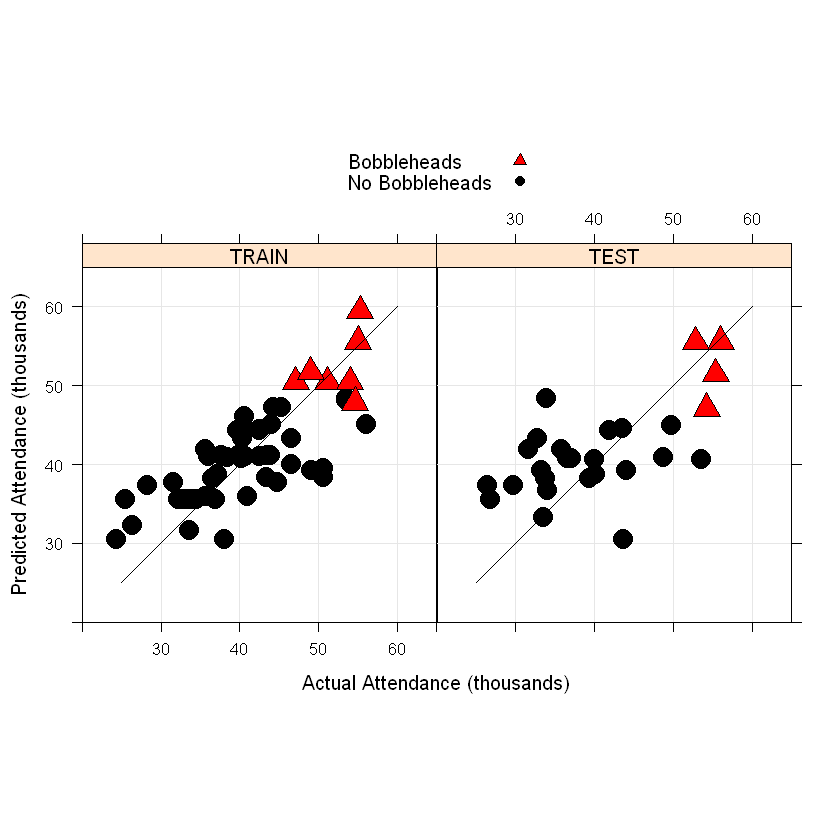

In [23]:
# generate predictive modeling visual
group.labels <- c("No Bobbleheads","Bobbleheads")
group.symbols <- c(21,24)
group.colors <- c("black","black")
group.fill <- c("black","red")
xyplot(predict_attend/1000 ~ attend/1000 | training_test,
       data = dodgers.plotting.frame, groups = bobblehead, cex = 2,
       pch = group.symbols, col = group.colors, fill = group.fill,
       layout = c(2, 1), xlim = c(20,65), ylim = c(20,65),
       aspect=1, type = c("p","g"),
       panel=function(x,y, ...)
            {panel.xyplot(x,y,...)
             panel.segments(25,25,60,60,col="black",cex=2)
            },
       strip=function(...) strip.default(..., style=1),
       xlab = "Actual Attendance (thousands)",
       ylab = "Predicted Attendance (thousands)",
       key = list(space = "top",
              text = list(rev(group.labels),col = rev(group.colors)),
              points = list(pch = rev(group.symbols),
              col = rev(group.colors),
              fill = rev(group.fill))))

Use bobblehead as a predictor variable to determine which day of the week could use an increase in attendence 


Call:
lm(formula = my.model, data = dodgers)

Residuals:
     Min       1Q   Median       3Q      Max 
-10786.5  -3628.1   -516.1   2230.2  14351.0 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             33909.16    2521.81  13.446  < 2e-16 ***
ordered_monthMay        -2385.62    2291.22  -1.041  0.30152    
ordered_monthJune        7163.23    2732.72   2.621  0.01083 *  
ordered_monthJuly        2849.83    2578.60   1.105  0.27303    
ordered_monthAug         2377.92    2402.91   0.990  0.32593    
ordered_monthSept          29.03    2521.25   0.012  0.99085    
ordered_monthOct         -662.67    4046.45  -0.164  0.87041    
ordered_day_of_weekTue   7911.49    2702.21   2.928  0.00466 ** 
ordered_day_of_weekWed   2460.02    2514.03   0.979  0.33134    
ordered_day_of_weekThur   775.36    3486.15   0.222  0.82467    
ordered_day_of_weekFri   4883.82    2504.65   1.950  0.05537 .  
ordered_day_of_weekSat   6372.06    2552.08   2.497  0.

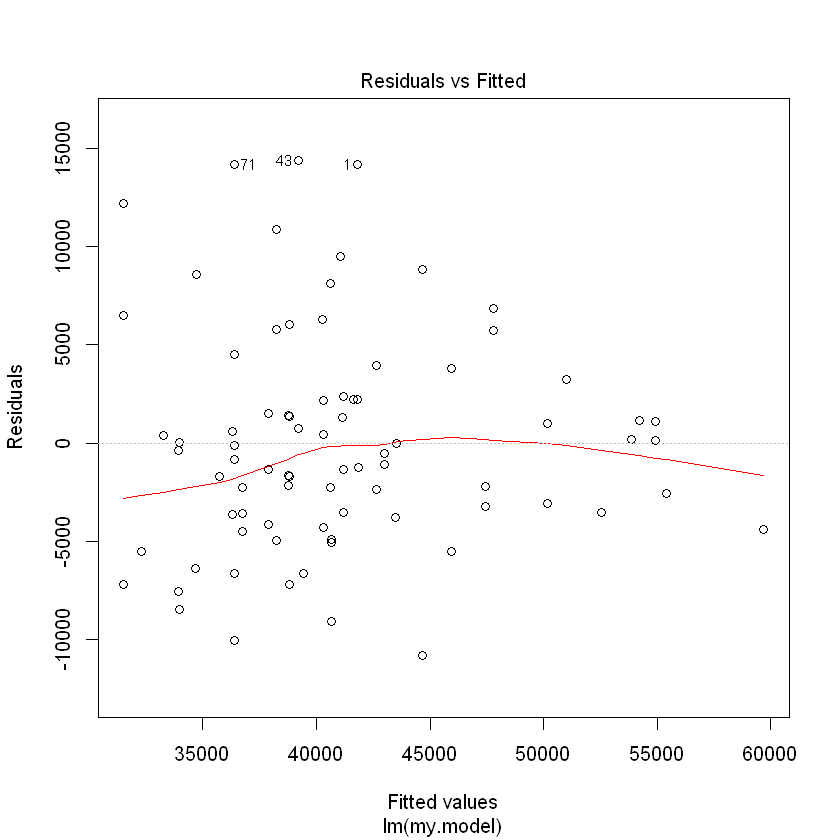

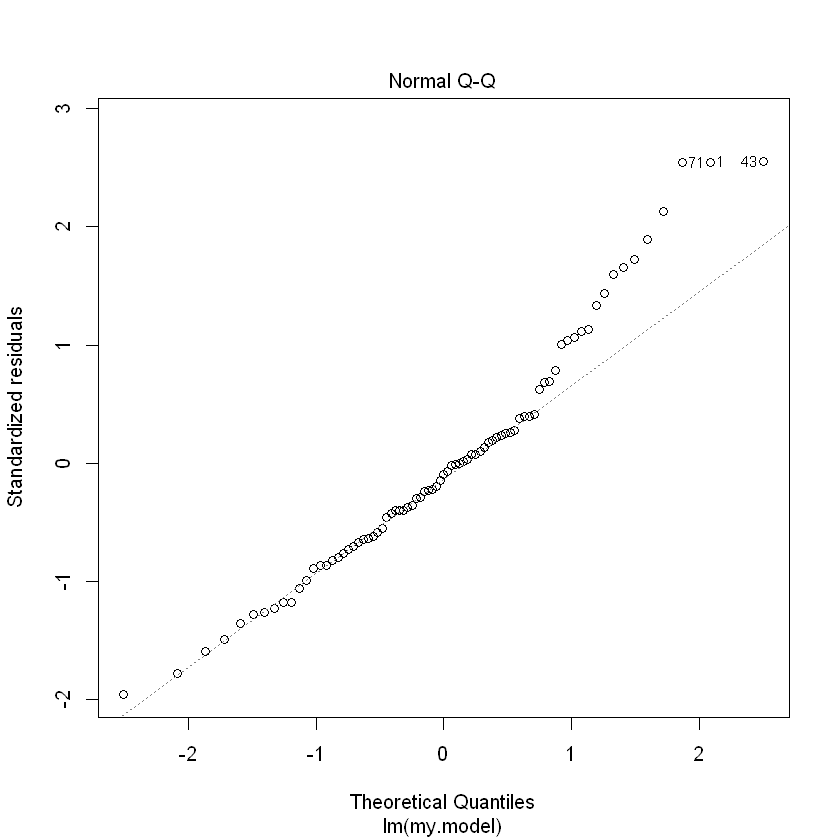

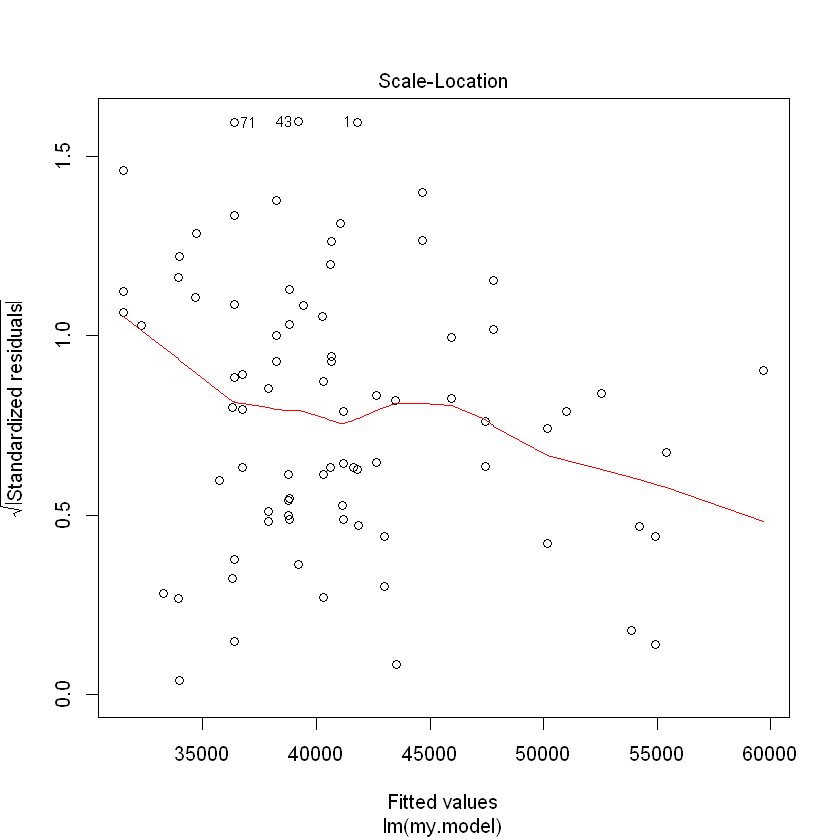

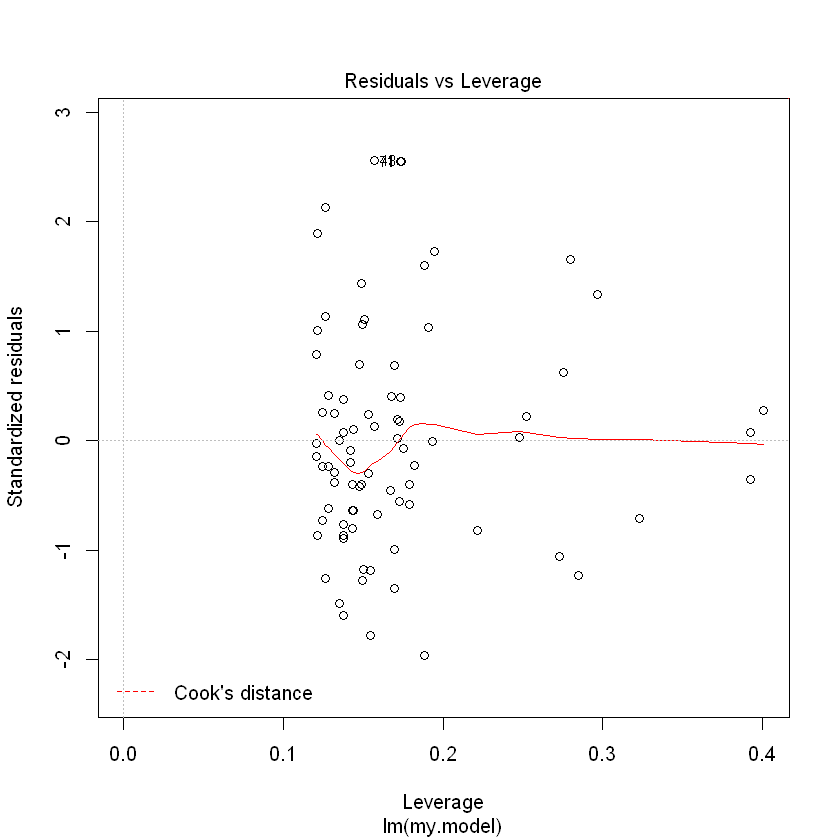

                    Test stat Pr(>|Test stat|)
ordered_month                                 
ordered_day_of_week                           
bobblehead                                    
Tukey test            -1.1229           0.2615


Warning message in mmps(...):
"Interactions and/or factors skipped"

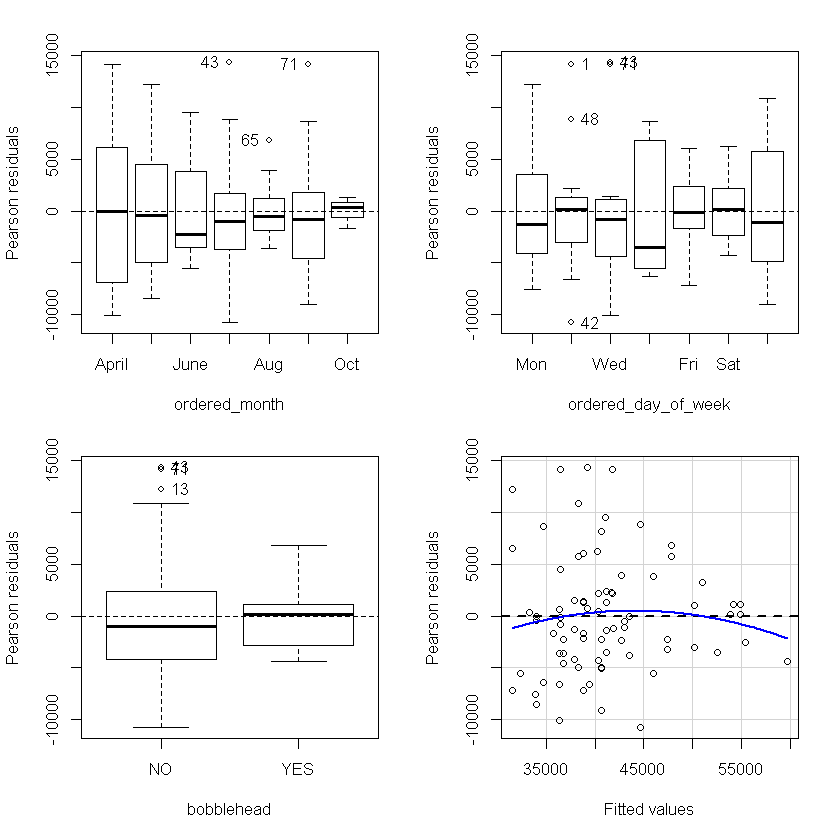

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
   rstudent unadjusted p-value Bonferroni p
43 2.668406          0.0095805      0.77602


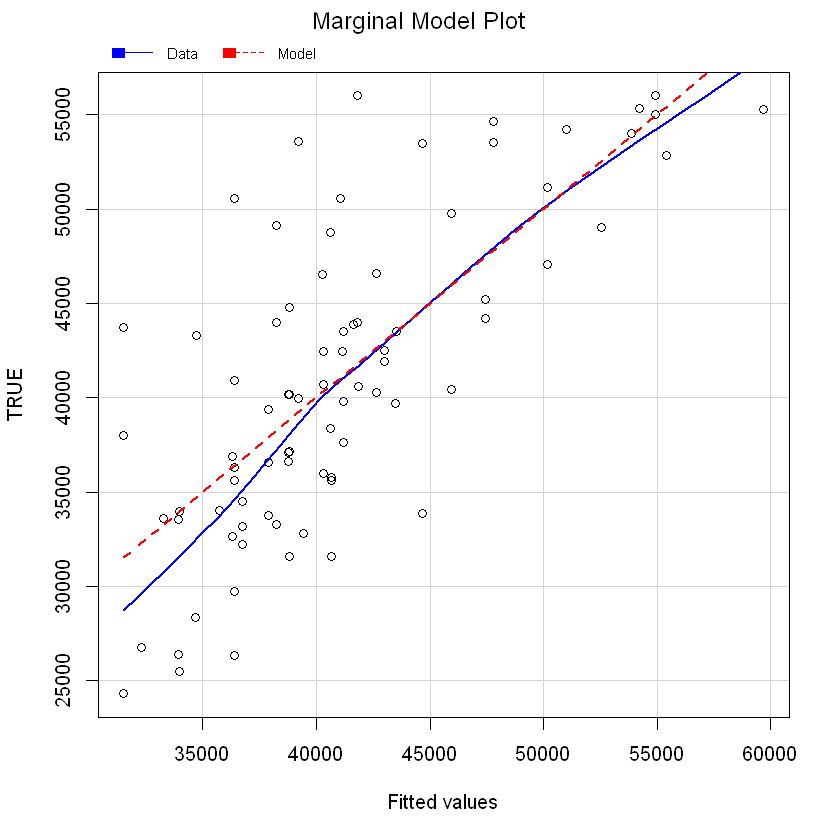

In [27]:
# use the full data set to obtain an estimate of the increase in
# attendance due to bobbleheads, controlling for other factors
my.model.fit <- lm(my.model, data = dodgers)  # all available data
print(summary(my.model.fit))
# tests statistical significance of the bobblehead promotion
# type I anova computes sums of squares for sequential tests
print(anova(my.model.fit))
cat("\n","Estimated Effect of Bobblehead Promotion on Attendance: ",
round(my.model.fit$coefficients[length(my.model.fit$coefficients)],
digits = 0),"\n",sep="")
# standard graphics provide diagnostic plots
plot(my.model.fit)
# additional model diagnostics drawn from the car package
residualPlots(my.model.fit)
marginalModelPlots(my.model.fit)
print(outlierTest(my.model.fit))

According to the model, by itself, a bobblehead promotion can potentially increase attendance by 10,715 fans per game so we can run a promotion on Monday nights, which according to our EDA visual, has the least amount of attendance. We can use a bobblehead promotion on Mondays to pick up the slack there.